In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
%matplotlib inline
plt.ion()

import os
import sys
import re
import pdb
import glob

sys.path.append('../code')
import utils

In [2]:
in_file = '../output/ratios_9nt_ss_locus.txt'
ht_df = pd.read_csv(in_file,sep='\t')
ht_df.set_index('ss',inplace=True,drop=True)
ht_df.head()

,brca2_9nt,ikbkap_9nt,smn1_9nt
ss,,,
AAAGCAAAA,0.076975,0.104390,0.030997
AAAGCAAAC,0.141863,0.079586,0.071297
AAAGCAAAG,0.155870,0.058732,0.028799
AAAGCAAAU,0.091296,0.093153,0.031767
AAAGCAACA,0.113007,0.130592,0.049450


In [7]:
# Normalize by consensus sequence
cons_seq = 'CAGGUAAGU'
for col in ht_df.columns:
    ht_df.loc[:,col] = 100*ht_df.loc[:,col]/ht_df.loc[cons_seq,col]
ht_df[ht_df>100] = 100

In [8]:
validation_file = '../data/library_validations.xlsx'
lt_df = pd.read_excel(validation_file)
lt_df.set_index('ss',inplace=True,drop=True)
lt_df.head()

,brca2_mean,brca2_std,smn1_mean,smn1_std,ikbkap_mean,ikbkap_std
ss,,,,,,
CACGUGAGC,32.475689,0.245617,0.0,0.0,0.000000,0.000000
CAUGUGAGC,10.734417,0.552055,0.0,0.0,0.000000,0.000000
CAAGUGAGC,24.499400,1.391693,0.0,0.0,0.000000,0.000000
GGAGUGAGU,13.616450,0.244311,0.0,0.0,0.203807,0.057783
AUGGCAAGU,31.587561,0.811330,0.0,0.0,0.000000,0.000000


In [9]:
df = ht_df.merge(lt_df,left_index=True,right_index=True,how='inner')
df.head()

,brca2_9nt,ikbkap_9nt,smn1_9nt,brca2_mean,brca2_std,smn1_mean,smn1_std,ikbkap_mean,ikbkap_std
ss,,,,,,,,,
CACGUGAGC,56.230274,0.679144,0.203810,32.475689,0.245617,0.0,0.0,0.000000,0.000000
CAUGUGAGC,19.932143,0.000000,0.272786,10.734417,0.552055,0.0,0.0,0.000000,0.000000
CAAGUGAGC,38.342058,0.159330,0.425370,24.499400,1.391693,0.0,0.0,0.000000,0.000000
GGAGUGAGU,29.231234,0.000000,0.594557,13.616450,0.244311,0.0,0.0,0.203807,0.057783
AUGGCAAGU,48.472747,0.056118,1.612381,31.587561,0.811330,0.0,0.0,0.000000,0.000000


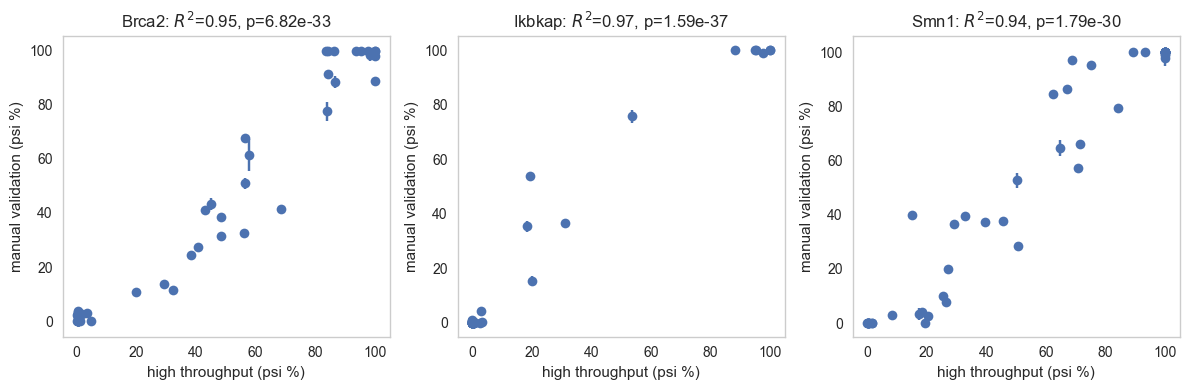

In [31]:
from scipy.stats import pearsonr
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=[12,4])
loci=['brca2','ikbkap','smn1']
for n, locus in enumerate(loci):
    plt.subplot(1,3,n+1)
    xs = df[locus+'_9nt']
    ys = df[locus+'_mean']
    dys = df[locus+'_std']
    indices = np.isfinite(xs) & np.isfinite(ys)
    r, p = pearsonr(xs[indices],ys[indices])
    plt.errorbar(xs,ys,yerr=dys,linestyle='none',marker='o')
    locus_name = locus[0].upper() + locus[1:]
    plt.title('%s: $R^2$=%.2f, p=%.2e'%(locus_name,r**2,p))
    plt.xlabel('high throughput (psi %)')
    plt.ylabel('manual validation (psi %)')
    
plt.tight_layout()
plt.savefig('validation_scatter.pdf')